In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

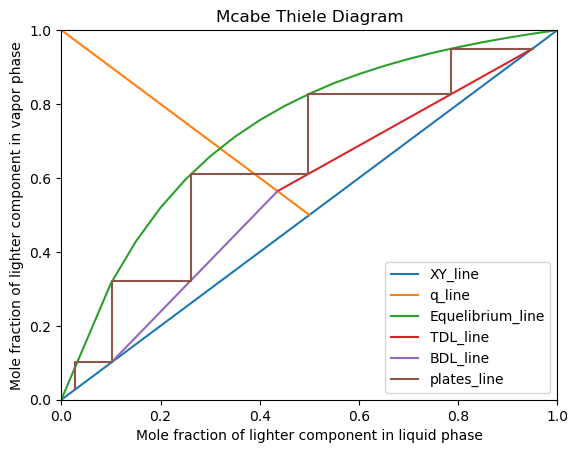

In [5]:
# Define a function that draws ""Mcabe Thiele Diagram"" and count trays
def count_trays(
    Xd=0.95, # top composition
    Xw=0.1, # bottom composition
    f=0.5, # volatile component fraction
    Q=0.5, # Quality of feed
    reflux_ratio=3,
    # Equilibriam Data
    equilibrium_x=[0.001, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,
                  0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
    equilibrium_y=[0.00393,0.31538,0.42806,0.51994,0.59565,0.65867,0.71162,0.75648,0.79479,0.82773,
                   0.85676,0.8811,0.90285,0.92201,0.93895,0.954,0.96743,0.97946,0.99026,1]
               ):
    if Q == 1:
        Q = 0.99999
    
    # Define XY line
    XY_x = [0, 1]
    XY_y = [0, 1]

    # Define q line
    m = Q/(1-Q) #slope of q line
    Q1 =  f + m*f
    q_x = [f, 0]
    q_y = [f, Q1]

    # Define Top equilibrium line and equation
    y_intercept = Xd/(reflux_ratio+1)
    cutoff = Xd-((Xd-f)*(Xd-y_intercept))/Xd
    TDL_m = (Xd-cutoff)/(Xd-f) #Slope of top line
    TDL_b = Xd-TDL_m*Xd #y intercept of top line
    const = (m*f+f-(Xd-TDL_m*Xd))/(m + TDL_m) # X cordinate of O point
    const1 = TDL_m * const + Xd-TDL_m*Xd # Y cordinate of O point
    TDL_x = [Xd, const]
    TDL_y = [Xd, const1]

    # Define Bottom equilibrium line and equation
    BDL_x = [Xw, const]
    BDL_y = [Xw, const1]
    BDL_m = (Xw-const1)/(Xw-const) #Slope of bottom line
    BDL_b = Xw-BDL_m*Xw #Y intercept of bottom line

    # Revarse Engineering to equilibrium curve to get more points on curve
    z = np.polyfit(equilibrium_x, equilibrium_y, 8)
    equ_x1 = np.arange(0,1,0.00025)
    p = np.poly1d(z)
    equ_y1 = np.round(p(equ_x1), 3)

    # Define plates plot
    plate_x = [Xd]
    plate_y = [Xd]
    x = Xd
    y = Xd

    # This loop is used to fint intersection to get plates' line
    while (x>Xw):
        idx = np.where(equ_y1==plate_y[-1])[0][0]
        x = equ_x1[idx]
        plate_x.append(x)
        plate_y.append(y)
        if (x>const):
            y = np.round(TDL_m * x + TDL_b, 3)
            plate_y.append(y)
            plate_x.append(x)
        else:
            y = np.round(BDL_m * x + BDL_b, 3)
            plate_y.append(y)
            plate_x.append(x)
    plate_y[-1] = plate_x[-1]

    # Plot the Diagram
    plt.plot(XY_x, XY_y, label = "XY_line") # XY line
    plt.plot(q_x, q_y, label = "q_line") # q line
    plt.plot(equilibrium_x, equilibrium_y, label = "Equelibrium_line") # Equilibrium curve
    plt.plot(TDL_x, TDL_y, label = "TDL_line") # Top line
    plt.plot(BDL_x, BDL_y, label = "BDL_line") # Bottom line
    plt.plot(plate_x, plate_y, label = "plates_line") # Plates lines

    # Give a title axis labels and legend 
    plt.title("Mcabe Thiele Diagram") # Title
    plt.xlabel("Mole fraction of lighter component in liquid phase") # X axis label
    plt.ylabel("Mole fraction of lighter component in vapor phase") # Y axis label
    plt.xlim(0, 1) # Limit x axis values between 0-1
    plt.ylim(0, 1) # Limit y axis values between 0-1
    plt.legend() # Adding legend
    plt.show() # Showing graph

# call function with default values (:
#                                                Youssef_MH
count_trays()

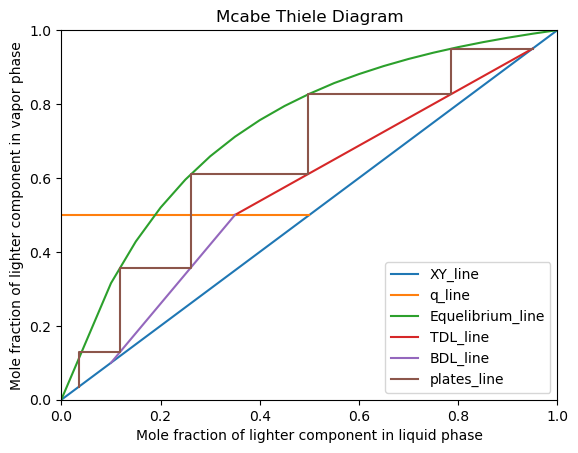

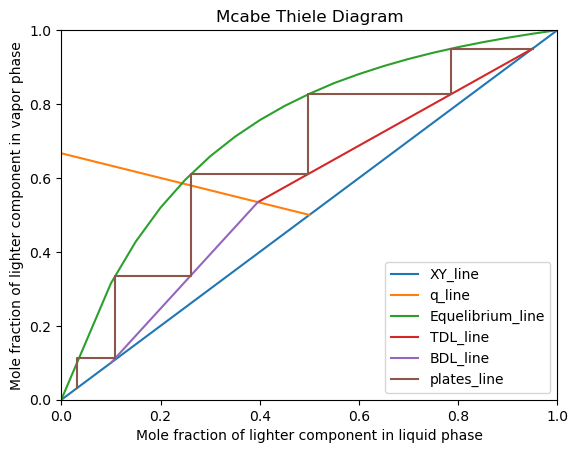

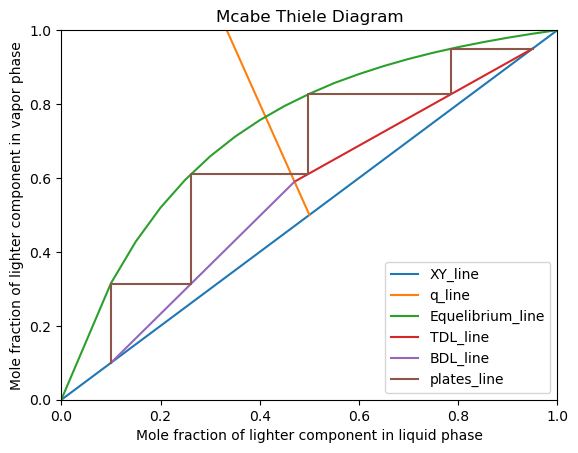

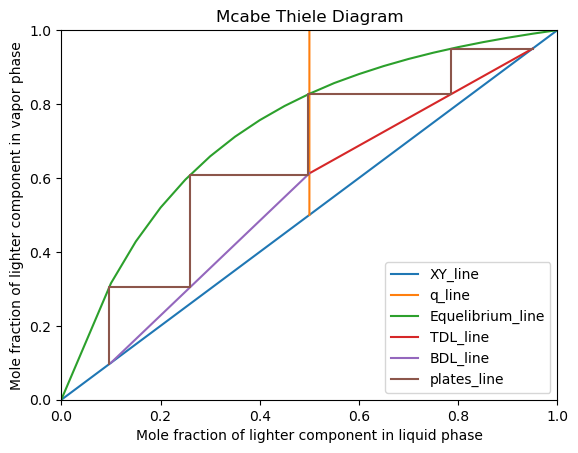

In [9]:
# Showing example of 4 Qs
for i, Q in enumerate([0, 0.25, 0.75, 1], 1):
    count_trays(Q=Q)